# Exercises: Unit 5, How sure can we be about what is going on: Estimates and Intervals

## Exercises

### Exercise 1: Thirsty students

Assume you are interested in the amount of water the stundent coming to the JWL study center consume in a day. In particular you want to learn about the proportion of students that drink more than 2 liters of water per day. You take a random sample of 100 students in the stundents directory of the study center and obtain from them the information about how much water they drink in a day at the study center. You store your results in a dataframe you call  `water`. The dataframe has one column calles `amount` which stores the number of liters each of the students drink.




1. Write one line of R-code to compute the proportion of students who drank more than 2 liters of water. Hint: You can write this line of code also when you are not at the computer. You can solve this exercise by thinking about what you would write, if you had an R console or a Jupyter book opened in front of you.

The code line would be: `mean(water[water$amount > 2])`

2. Write one line of R-code to compute a single bootstrap resample from the water dataframe.

The code line would be: `water[sample(x = 1:nrow(water), size = nrow(water), replace = T)]`

### Exercise 2: Check your understanding of why the bootstrap works

1. When we conduct a bootstrap resample, what size resample should we draw from our sample? Why? Hint: There is no unique answer to the size question only rules of thumb. When you think about the why, go back to consult our discussion on why random sampling works in unit 2.

We should aim for a large resample in the order of magnitude of about more than 1000, ideally 5000 to 10000. Why? This works because by the law of averages, when we repeat a random experiment very often under identical conditions, the relative frequency of an event gets closer to the actual probability of this event occuring. This is also referred to as the law of averages (see unit 3 and the discussion of random sampling there)

2. Why do we need to sample with replacement?

The idea is that the sample is a rough representation of the population. When we resample 
randomly each element at every resample needs to have the same chance of ending up in the resample. This is why
at every draw we put all the data back in the sample before we draw again.

3. When we conduct a bootstrap resample, what is the underlying assumption/reasoning for resampling from
our sample? Why does it work?

The underlying reasoning is that the sample is a rough representation of the population in that it has 
a similar distribution. Thus when we repeatedly draw at random from the sample we will be the law of averages approach the distribtion of the population as the number of resamples grows larger.

## Exercises R:

### Exercise 1: A toy problem for practicing iteration.

Load the pearson height data from the `JWL`package and transform the data to standard units using a for loop.
Hint: You will need a function and an interation over the columns of the dataframe.

In [1]:
library(JWL)
data  <- pearson
head(data)

,Father,Son
,<dbl>,<dbl>
1,65.0,59.8
2,63.3,63.2
3,65.0,63.3
4,65.8,62.8
5,61.1,64.3
6,63.0,64.2


In [2]:
# Function to nomralize any column i

rescale  <- function(data, i){
    
    m  <- mean(data[ ,i])
    s  <- sd(data[, i])
    
    (data[ ,i] - m)/s
    
}

In [3]:
output  <- vector("list", ncol(data))

for(i in seq_along(1:ncol(data))){
    
    output[[i]]  <- rescale(data , i)
    
    res  <- as.data.frame(do.call(cbind, output))
    
    names(res)  
}

names(res)  <- c("Father", "Son")
head(res)

,Father,Son
,<dbl>,<dbl>
1,-0.9785130,-3.154694
2,-1.5976343,-1.947391
3,-0.9785130,-1.911882
4,-0.6871618,-2.089426
5,-2.3988501,-1.556793
6,-1.7068910,-1.592302


In [4]:
# Check results

mean(res$Father)
sd(res$Father)

mean(res$Son)
sd(res$Son)

[1] -1.311006e-15

[1] 1

[1] -1.337324e-15

[1] 1

### Exercise 2: Bootstrapped interquartile range of height data

To practice the bootstrapping technique we learned in this unit, let us load the human height data `socr_height_weight` once again from the JWL package. Take a sample of 5000 of the height data and compute the interquartile range. Implement a bootstrap with 10000 resamples to quantify the uncertainty in the sample inter quartile range for the inter quartile range, i.e. the difference between the 25 and the 75 percentile of the height 
distribution. Compute the range in which 95 % of the inter-quartile-ranges lie. You can leave the data for this exercise in the original units of inches. Hint: For the interquartile range consult the passage on percentiles in unit 3. If you do 10000 bootstraps this might take a while in times of computation. As long as the `In [*]` cell has a star in the brackets and not a number, the computation is still going on. So you will need a bit of patience for computing this exercise.

In [5]:
library(JWL)
dat  <- socr_height_weight
head(dat)

,Index,Height,Weight
,<dbl>,<dbl>,<dbl>
2,1,65.78331,112.9925
3,2,71.51521,136.4873
4,3,69.39874,153.0269
5,4,68.21660,142.3354
6,5,67.78781,144.2971
7,6,68.69784,123.3024


In [6]:
# Take a sample of 5000 Height data from `socr_height_weight`

samp <- dat[sample(x = 1:nrow(dat), size = 5000, replace = T), ]
IQR(samp$Height)

[1] 2.57579

In [7]:
# bootstrap

output  <- vector("double", length = 10000)

for(i in seq_along(1:10000)){
    
    aux  <- samp[sample(1:nrow(samp), nrow(samp), replace = T), ]
    
    output[[i]] <- IQR(aux$Height)
    
}

round(quantile(output, c(0.025, 0.975)),2)

2.5% 97.5% 
 2.50  2.66

95 % of the IQRs are between 2.53 and 2.69 inches of Height. We might do a histirgram of the sampled statistics showing the dofferent IQRs on the x-axis and the Frequency on the y-axis.

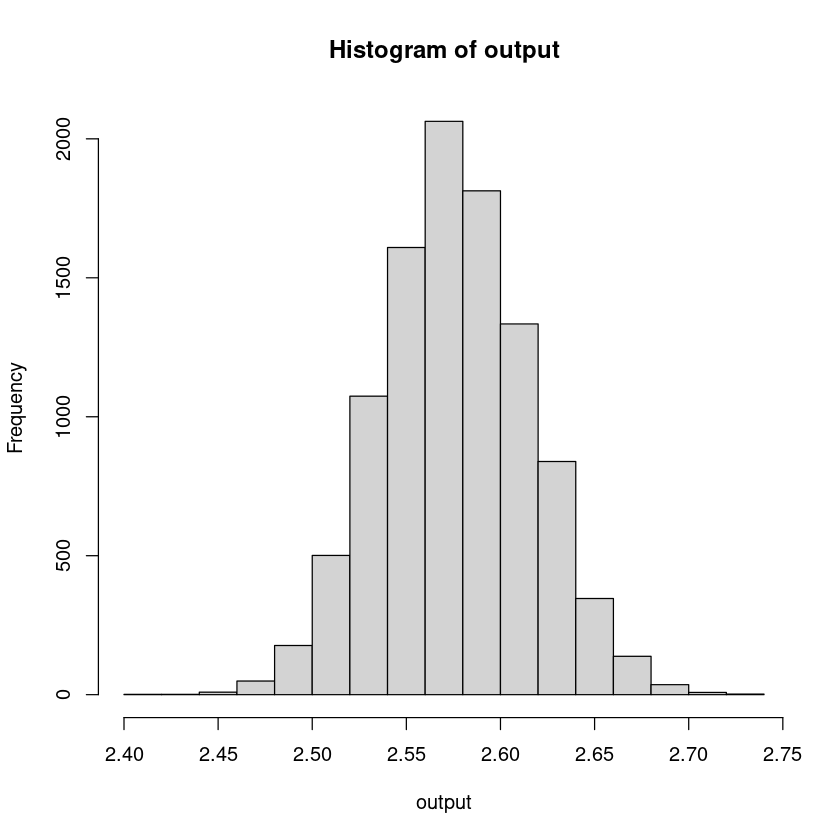

In [8]:
hist(output)

## Project People count

### Quantifying the uncertainty related to our mean age estimates of a country

In our project in unit 2 we estimated the mean age of the
population in Kenya, the United States and Japan as well as in
your own country in the year 2022. In unit 3 we eatimated the median age for this
year. In this project we will leverage our
knowledge of the bootstrap to attach some uncertainty interval
to our estimate. Let us use Kenya as an example

1. Filtering the data for Kenya: This is a repitation of what we have done already previously. Take the data `population_statistics_by_age_and_sex` from the `JWL` package and store it in an R object. Check whether the data you get in this way is what you want.

In [9]:
library(JWL)
dat <- population_statistics_by_age_and_sex
head(dat)

,Country,ISO2,Year,Sex,Age,POP
,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,Andorra,AD,1950,F,0-4,NA
2,Andorra,AD,1950,F,5-9,NA
3,Andorra,AD,1950,F,10-14,NA
4,Andorra,AD,1950,F,15-19,NA
5,Andorra,AD,1950,F,20-24,NA
6,Andorra,AD,1950,F,25-29,NA


In [10]:
data  <- dat[dat$Country == "Kenya" & dat$Year == 2022, ]

head(data)

,Country,ISO2,Year,Sex,Age,POP
,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
612921,Kenya,KE,2022,F,0-4,3487490
612922,Kenya,KE,2022,F,5-9,3404421
612923,Kenya,KE,2022,F,10-14,3444606
612924,Kenya,KE,2022,F,15-19,3225971
612925,Kenya,KE,2022,F,20-24,2656730
612926,Kenya,KE,2022,F,25-29,2139208


2. Implement a bootstrap for the mean age in these countries using your previous
results and the techniques you learned in this unit and report the bounds that
contain 95 % of these estimates based on 5000 resamples from the appropriate distribution.

First we compute the estimated mean age by using the idea of approximating the age in each age group by the
mid point of the age interval and multiply this with the population number. This gives us an estimate of the
number of people with this estimated age in an age group. Adding up over age groups and dividing by the total
population number gives us the mean age. We can create this approximation column and add it to the dataframe to
base the resampling distribution on this distribution.

Let's start with Kenya:

In [11]:
# Create a sequence of mid points for the age groups 2,7,12, ..., 97

mid  <- seq(2,100,5)


# Add the colum which multiplies the age mid point with the population number in that age group. This
# approximates the age in say group 80-89 by approximating every members age in this group by 87 and then
# multiply this by the population number in this group, giving the sum of the approximate age in this group.

data$distr  <-  data$POP*mid

head(data)

,Country,ISO2,Year,Sex,Age,POP,distr
,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
612921,Kenya,KE,2022,F,0-4,3487490,6974980
612922,Kenya,KE,2022,F,5-9,3404421,23830947
612923,Kenya,KE,2022,F,10-14,3444606,41335272
612924,Kenya,KE,2022,F,15-19,3225971,54841507
612925,Kenya,KE,2022,F,20-24,2656730,58448060
612926,Kenya,KE,2022,F,25-29,2139208,57758616


The mid age is then

In [12]:
sum(data$distr)/sum(data$POP)

[1] 24.23509

As we should have derived in unit 2.

In [13]:
# construct a bootstrap of the mean age

output  <- vector("double", 5000)

for(i in seq_along(1:5000)){
    
    # the resampled dataframe
    
    aux  <- data[sample(1:nrow(data), nrow(data), replace = T), ]
    
    # compute the mean age for this resample
    
    output[[i]]   <- sum(aux$distr)/sum(aux$POP)
    
}

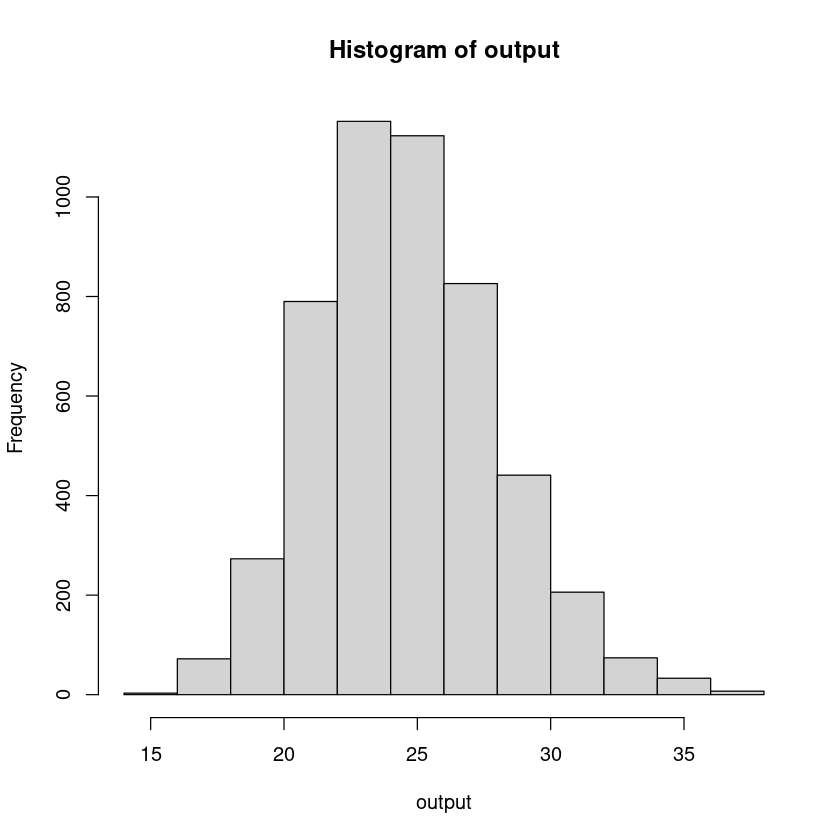

In [14]:
# check the result by plotting a historgam

hist(output)

In [15]:
# compute the quantiles within which we have 95 %

quantile(output, c(0.025, 0.975))

2.5%    97.5% 
18.64072 31.80938

The mean age we get in this way is quite imprecise and the interval within which the mean age can be is very
large, about 12 years. So we see that our approximation is very coarse.

3. What kind of data would you need to get a more precise estimate. What do you think? Explain in a few sentences.

For a more precise estimate we would need individual census data giving the age by individual and not by age
groups. By the grouping and the group mid point approxiamtion we loose lots of precision.